In [12]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from itertools import product
import time
!pip install kmodes
df = pd.read_csv('DATA/Truck_drivers_final.csv')

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1014405.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 885075.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 836972.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 805464.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 783809.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 766508.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 749917.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, it

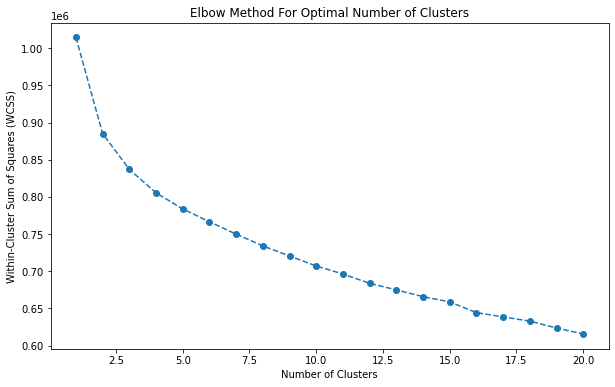

Elapsed Time: 3079.1940383911133 seconds


In [13]:
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
from sklearn import preprocessing

variables = df[['deviation', 'seniority_in_the_job_months', 'age', 'Quarter', 'time_workday', 'specific_physical_activity', 'injured_body_part', 'injury_description']]

start_time = time.time()
# Elbow method: Calculate WCSS for different numbers of clusters
wcss = []
for n_clusters in range(1, 21):
    km = KModes(n_clusters=n_clusters, init='Cao', n_init=1, verbose=1)
    clusters = km.fit_predict(variables)
    wcss.append(km.cost_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed Time:", elapsed_time, "seconds")

<ipython-input-14-4db080891e68>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables[column] = le.fit_transform(variables[column])


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 885075.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 836972.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 805464.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 783809.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 766508.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 749917.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 734078.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, ite

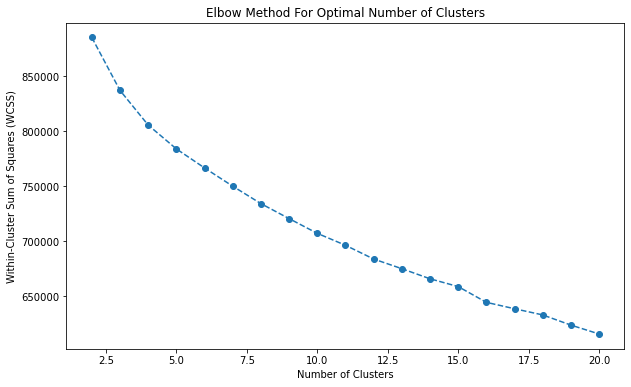

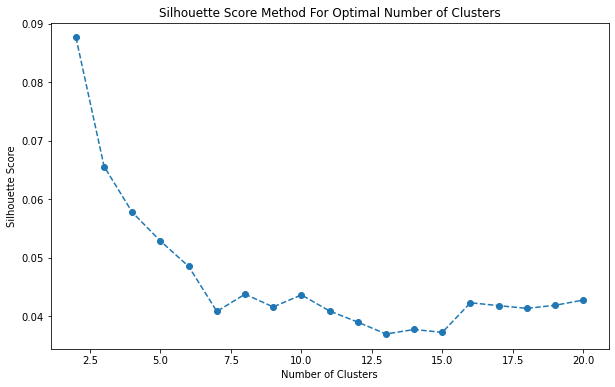

Elapsed time: 34466.178703546524 seconds


In [14]:
import pandas as pd
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import time

# Assuming df is your dataframe
variables = df[['deviation', 'seniority_in_the_job_months', 'age', 'Quarter', 'time_workday', 'specific_physical_activity', 'injured_body_part', 'injury_description']]

# Encode categorical variables
label_encoders = {}
for column in variables.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    variables[column] = le.fit_transform(variables[column])
    label_encoders[column] = le

start_time = time.time()

# Elbow method: Calculate WCSS for different numbers of clusters
wcss = []
silhouette_scores = []

for n_clusters in range(2, 21):
    km = KModes(n_clusters=n_clusters, init='Cao', n_init=1, verbose=1)
    clusters = km.fit_predict(variables)
    wcss.append(km.cost_)
    
    # Calculate silhouette score
    score = silhouette_score(variables, clusters, metric='hamming')
    silhouette_scores.append(score)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method For Optimal Number of Clusters')
plt.show()

end_time = time.time()
print(f"Elapsed time: {end_time - start_time} seconds")
